# Notebook EDA
# and Create the Training, Validation, Testing data set

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from constant import *
from data import Dataset

Load the whole dataset:

In [2]:
d = Dataset(
    DATA_DIR, 
    MODEL_PATH, 
    -1, 
    -1, 
    -1, 
    -1, 
    -1, 
    -1
)

df = d.load_dataset()

Train NBs:  75%|███████▍  | 103980/139256 [03:06<01:01, 569.49it/s]

Take a look at the dataset:

In [ ]:
df.head()

,id,cell_id,cell_type,source,rank,pct_rank,ancestor_id,parent_id
0,005a0b5efe318c,2aeaa963,markdown,# Kaggle Seattle Airbnb\n\n## Project Info\n\n...,0,0.0,2d5d7ed0,NaN
1,005a0b5efe318c,2993372a,markdown,---\n\n# Airbnb Exploration\n\n## Who needs th...,1,0.012195,2d5d7ed0,NaN
2,005a0b5efe318c,20bfc5dd,markdown,---\n\n# Dependencies,2,0.02439,2d5d7ed0,NaN
3,005a0b5efe318c,ad61a02e,code,# Statistics\nimport pandas as pd\nimport nump...,3,0.036585,2d5d7ed0,NaN
4,005a0b5efe318c,9c7e9cf9,markdown,---\n\n## Load Datasets\n\n- listings: The lis...,4,0.04878,2d5d7ed0,NaN


## Notebook EDA

### Get the distribution of the number of cells within each notebook

In [ ]:
cell_num = df.groupby("id").count()

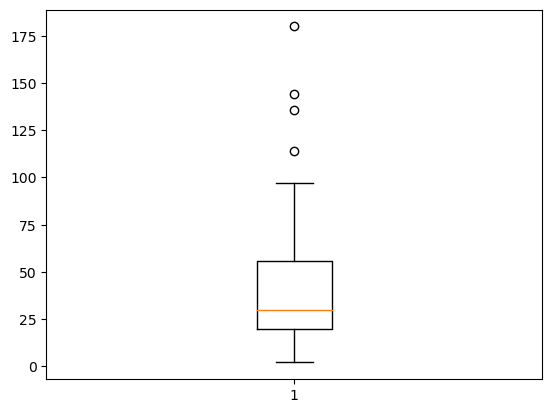

In [ ]:
plt.boxplot(cell_num["cell_id"])
plt.show()

From the plot above, there are some outliers having from more than about 128 to 1000 cells within a notebook. Let's figure out how much of them are in our dataset:

In [ ]:
np.mean(cell_num["cell_id"] > 128) * 100

3.0

There are only 4% of them. So we end up remove the out of our dataset.

In [ ]:
cell_num = cell_num[cell_num["cell_id"] <= 128]

Plot the distribution after removing outliers:

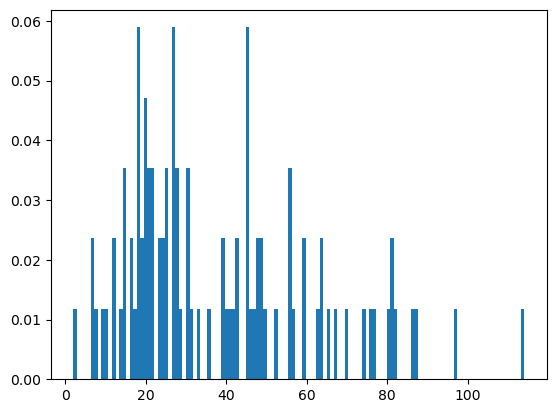

In [ ]:
plt.hist(cell_num.cell_id, density=True, bins=128)
plt.show()

### Get the distribution of the number of words within each cell

In [ ]:
df_temp = df.assign(word_count = lambda x: (x['source'].str.split().str.len()))
df_temp.head()

,id,cell_id,cell_type,source,rank,pct_rank,ancestor_id,parent_id,word_count
0,005a0b5efe318c,2aeaa963,markdown,# Kaggle Seattle Airbnb\n\n## Project Info\n\n...,0,0.0,2d5d7ed0,NaN,359
1,005a0b5efe318c,2993372a,markdown,---\n\n# Airbnb Exploration\n\n## Who needs th...,1,0.012195,2d5d7ed0,NaN,440
2,005a0b5efe318c,20bfc5dd,markdown,---\n\n# Dependencies,2,0.02439,2d5d7ed0,NaN,3
3,005a0b5efe318c,ad61a02e,code,# Statistics\nimport pandas as pd\nimport nump...,3,0.036585,2d5d7ed0,NaN,225
4,005a0b5efe318c,9c7e9cf9,markdown,---\n\n## Load Datasets\n\n- listings: The lis...,4,0.04878,2d5d7ed0,NaN,40


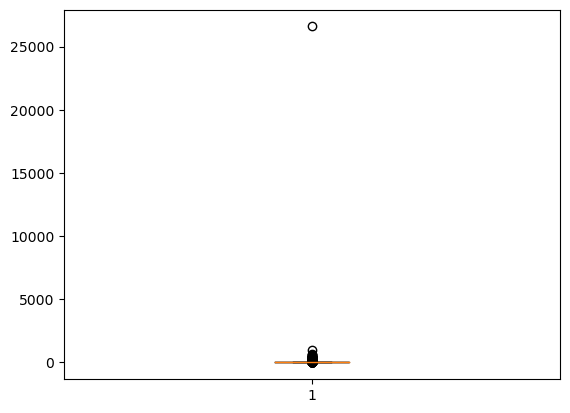

In [ ]:
plt.boxplot(df_temp["word_count"])
plt.show()

From the plot above, let's figure out how many percent that a cell contains more than 128 words:

In [ ]:
np.mean(df_temp["word_count"] > 128) * 100

3.5172247651168393

There are only 4% that a cell having more than 128 words. Ideally, while training we should limit the number of words within a cell to 128. Take a look at how the number of words with a cell with less than 128 words distribute:

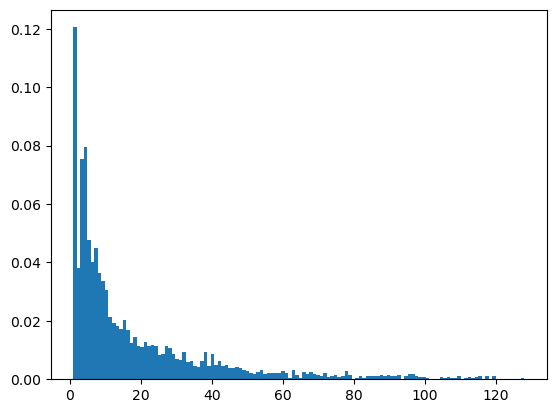

In [ ]:
plt.hist(df_temp[df_temp["word_count"] <= 128].word_count, bins=128, density=True)
plt.show()

## Split dataset

Since there are almost 140k notebooks in the dataset, we should use about 5k for the validation set and another 5k for the test set. The remaining is used for training.

So we will use test size with 9% for both the validation and test set:

In [ ]:
train, val_test = train_test_split(
    df.groupby("id").count(), 
    test_size=0.09, 
    random_state=42
)

In [ ]:
train = df.reset_index(drop=True).merge(
    pd.Series(train.index, index=train.index), 
    how="right", 
    left_on="id", 
    right_index=True
)

train = train.drop(["id_x", "id_y"], axis=1)

In [ ]:
train.head()

,id,cell_id,cell_type,source,rank,pct_rank,ancestor_id,parent_id
0,005a0b5efe318c,2aeaa963,markdown,# Kaggle Seattle Airbnb\n\n## Project Info\n\n...,0,0.0,2d5d7ed0,NaN
1,005a0b5efe318c,2993372a,markdown,---\n\n# Airbnb Exploration\n\n## Who needs th...,1,0.012195,2d5d7ed0,NaN
2,005a0b5efe318c,20bfc5dd,markdown,---\n\n# Dependencies,2,0.02439,2d5d7ed0,NaN
3,005a0b5efe318c,ad61a02e,code,# Statistics\nimport pandas as pd\nimport nump...,3,0.036585,2d5d7ed0,NaN
4,005a0b5efe318c,9c7e9cf9,markdown,---\n\n## Load Datasets\n\n- listings: The lis...,4,0.04878,2d5d7ed0,NaN


In [ ]:
val_test = df.reset_index(drop=True).merge(
    pd.Series(val_test.index, index=val_test.index), 
    how="right", 
    left_on="id", 
    right_index=True
)

val_test = val_test.drop(["id_x", "id_y"], axis=1)

In [ ]:
val_test.head()

,id,cell_id,cell_type,source,rank,pct_rank,ancestor_id,parent_id
3525,d13e854529cbaa,71f76f20,markdown,# Blending High Scores\n## Upvote if you like,0,0.0,df4ab5fe,NaN
3526,d13e854529cbaa,9aa803df,code,# Blending with https://www.kaggle.com/alfredm...,1,0.111111,df4ab5fe,NaN
3527,d13e854529cbaa,296055d7,code,import numpy as np\nimport pandas as pd\nimpor...,2,0.222222,df4ab5fe,NaN
3528,d13e854529cbaa,254c2b31,code,sub1 = pd.read_csv('../input/housesbumissions/...,3,0.333333,df4ab5fe,NaN
3529,d13e854529cbaa,e228da97,code,print( sub1['SalePrice'].describe() )\nprint( ...,4,0.444444,df4ab5fe,NaN


For the validation and the test set, we are going to use the notebooks that the model has not seen from the training process. To accomplish it, we should remove all the notebooks that their parent id is valid (i.e. remove the notebooks forked from another notebook):

In [ ]:
# filter the val_test set
temp = val_test
val_test = val_test[val_test.parent_id.isnull()]

The notebooks in ```val_test``` that have the valid parent ids will be returned to the ```train``` set:

In [ ]:
# append train set
temp = temp[temp.parent_id.notnull()]
train = train.append(temp, ignore_index=True)

/var/folders/t5/xgs6h3fs2tn72mlvfg80_23w0000gn/T/ipykernel_41059/3033907860.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(temp, ignore_index=True)


Equally split the ```val_test``` into validation and test set:

In [ ]:
val, test = train_test_split(
    val_test.groupby("id").count(), 
    test_size=0.5, 
    random_state=42
)

In [ ]:
val = df.reset_index(drop=True).merge(
    pd.Series(val.index, index=val.index), 
    how="right", 
    left_on="id", 
    right_index=True
)

val = val.drop(["id_x", "id_y"], axis=1)

In [ ]:
test = df.reset_index(drop=True).merge(
    pd.Series(test.index, index=test.index), 
    how="right", 
    left_on="id", 
    right_index=True
)

test = test.drop(["id_x", "id_y"], axis=1)

## Save the split data

In [ ]:
train.to_csv("data/train.csv", index=False)
test.to_csv("data/test.csv", index=False)
val.to_csv("data/val.csv", index=False)